# LetsGrowMore
Name : UMA MAHESWARI

Task 2 : Prediction using Decision Tree  Algorithm

Level 02 : INTERMEDIATE LEVEL 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Data Loading and Exploration

In [2]:
iris = pd.read_csv("Iris.csv")iris.shape

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.shape

(150, 6)

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#### Data Cleaning

In [7]:
iris = iris.fillna('NaN')

In [8]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
iris.dropna(inplace = True) ##Removing missing data

In [10]:
# Import the needed matplotlib functionality for scatter plot visualization.
import matplotlib.pyplot as plt
# import the needed dataset.
from sklearn.datasets import load_iris
# Import the model and an additional visualization tool.
from sklearn.tree import DecisionTreeClassifier, plot_tree

<AxesSubplot:>

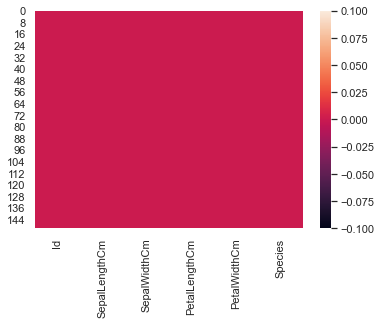

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
sns.heatmap(iris.isnull())

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


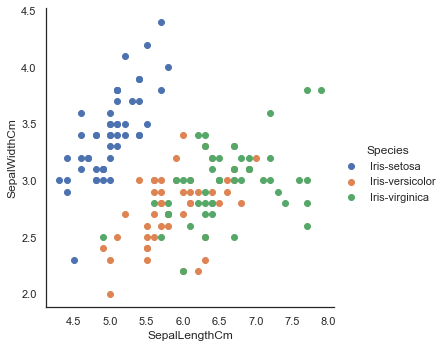

In [14]:
#Let see how the classes are separated

sns.FacetGrid(iris, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


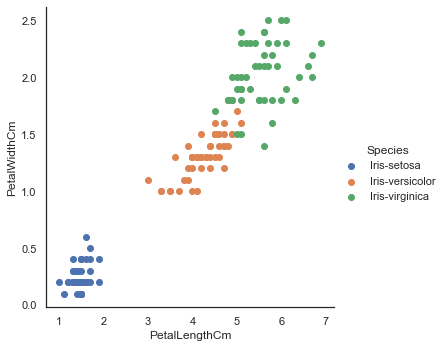

In [16]:
#Let see how the classes are separated
sns.FacetGrid(iris, hue= "Species", size = 5).map(plt.scatter, "PetalLengthCm", "PetalWidthCm").add_legend()
plt.show()

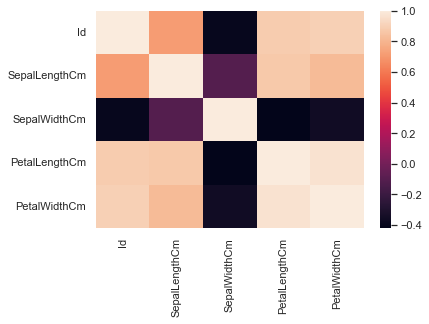

In [18]:

# import correlation matrix to see parametrs which best correlate each other
# According to the correlation matrix results PetalLengthCm and
#PetalWidthCm have possitive correlation which is proved by the plot above

import seaborn as sns
corr = iris.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

plt.show()

# Decision Tree

In [19]:
# import the needed dataset.
from sklearn.datasets import load_iris
# Import the model and an additional visualization tool.
from sklearn.tree import DecisionTreeClassifier, plot_tree

Once imports are complete, we may define a few parameters for later use...

In [20]:
# Define a variable to establish three classes/species.
class_count = 3
# Define standard RGB color scheme for visualizing ternary classification in order to match the color map used later.
plot_colors = 'brg'
# Define marker options for plotting class assignments of training data.
markers = 'ovs'
# We also need to establish a resolution for plotting.  I favor clean powers of ten, but this is not by any means a hard and fast rule.
plot_res = 0.01

In [21]:
# Load the iris dataset from scikit-learn (note the use of from [library] import [function] above)
iris = load_iris()

Let us now go about applying the decision tree model in a pairwise fashion to the available features to see some simple applications of how decision trees can assign classifications to individual samples. Since the data set is small and we aren't concerned today with validation, we won't bother with a train-test split.

(0.5, 7.390000000000006, -0.4, 2.9900000000000033)

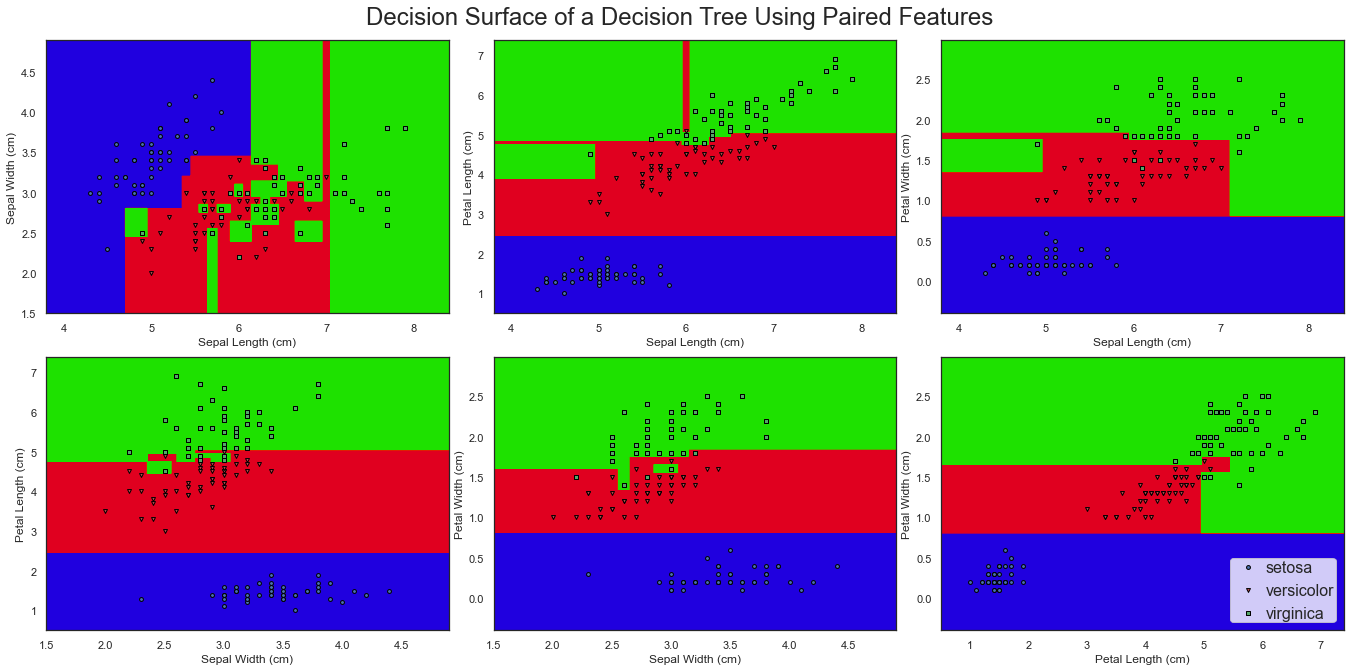

In [22]:
# Set the size of the figure used to contain the subplots to be generated.
plt.figure(figsize=(20,10))

# Create an empty list of models to store the results of each pairwise model fit.
models = []

# Use enumerate() to define the possible pairs of features available and iterate over each pair.
for pair_index, pair in enumerate([[0, 1], [0, 2], [0, 3], 
                                           [1, 2], [1, 3], 
                                                   [2, 3] ]):

    # We only take the two features corresponding to the pair in question...
    X, y = iris.data[:, pair] , iris.target
    
    # ... to fit the decision tree classifier model.
    model = DecisionTreeClassifier().fit(X, y)
    
    # Append the results to the models list
    models.append(model)
    
    # Establish a two row by three column subplot array for plotting.
    plt.subplot(2, 3, pair_index + 1)
    
    # Define appropriate x and y ranges for each plot...
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    # ... and use each range to define a meshgrid to use as the plotting area.
    xx, yy = np.meshgrid(np.arange(x_min, 
                                   x_max, 
                                   plot_res),
                         np.arange(y_min, 
                                   y_max, 
                                   plot_res) )
    # Use plt.tight_layout() to establish spacing of the subplots.
    plt.tight_layout(h_pad = 0.5, 
                     w_pad = 0.5, 
                       pad = 4.0 )
    
    # Predict the classification of each point in the meshgrid based on the calculated model above.
    # The numpy methods .c_() and .ravel() reshape our meshgrid values into a format compatible with our model.predict() method,
    Z = model.predict(np.c_[xx.ravel(), 
                            yy.ravel() ])
    # Reshape the predictions to match xx...
    Z = Z.reshape(xx.shape)
    # ... and prepare a contour plot that reflects the predictions .
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.brg)
    
    # Define the subplot axis labels after title casing while preserving case on the unit of measure 
    plt.xlabel(iris.feature_names[pair[0]].title()[0:-4] + iris.feature_names[pair[0]][-4:])
    plt.ylabel(iris.feature_names[pair[1]].title()[0:-4] + iris.feature_names[pair[1]][-4:])
    
    # Plot the training points for each species in turn
    for i, color, marker in zip(range(class_count), plot_colors, markers):
        # Subset the data to the class in question with the np.where() method
        index = np.where(y == i)
        # Plot the class in question on the subplot
        plt.scatter(X[index, 0], 
                    X[index, 1], 
                    c = color,
                    marker = marker,
                    label = iris.target_names[i],
                    cmap = plt.cm.brg, 
                    edgecolor = 'black', 
                    s = 15                       )

# Define a title for the overall collection of subplots after each subplot is fully defined
plt.suptitle('Decision Surface of a Decision Tree Using Paired Features',
             size = 24                                                   )

# Define the legend for the subplot collection
plt.legend(loc = 'lower right',
           fontsize = 16,
           borderpad = 0.1, 
           handletextpad = 0.1 )

# Set limits just large enough to show everything cleanly
plt.axis("tight")

Note that in the above plots, there are occasionally generated small islands or peninsulae of classification which show us the Achilles' heel of Decision tree models: their tendency to overfit the data. While these small cutouts improve the accuracy of the model on the training data, they also result in a model that applies increasingly implausible critera to the data which likely won't stand up when new data is used to test the model.

It is also interesting to note that with only two parameters available, a very high degree of accuracy is achievable in the last subplot using only petal length and petal, width with only a single modest and sensibly positioned peninsula.

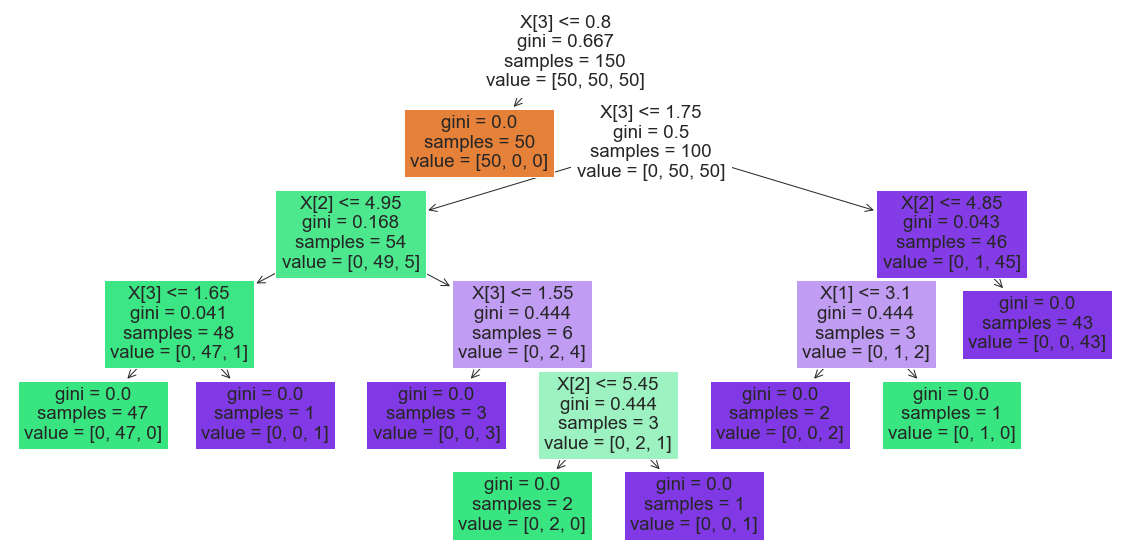

In [23]:
# Apply the decision tree classifier model to the data using all four parameters at once.
model_all_params = DecisionTreeClassifier().fit(iris.data, iris.target)
# Prepare a plot figure with set size.
plt.figure(figsize = (20,10))
# Plot the decision tree, showing the decisive values and the improvements in Gini impurity along the way.
plot_tree(model_all_params, 
          filled=True      )
# Display the tree plot figure.
plt.show()

We may very simply add the max_depth parameter to the model with a value of 3 and observe the effect of forcing some simplicity on the tree, akin to pruning all the smallest branches of a tree down to a few points of divergence closest to the trunk.

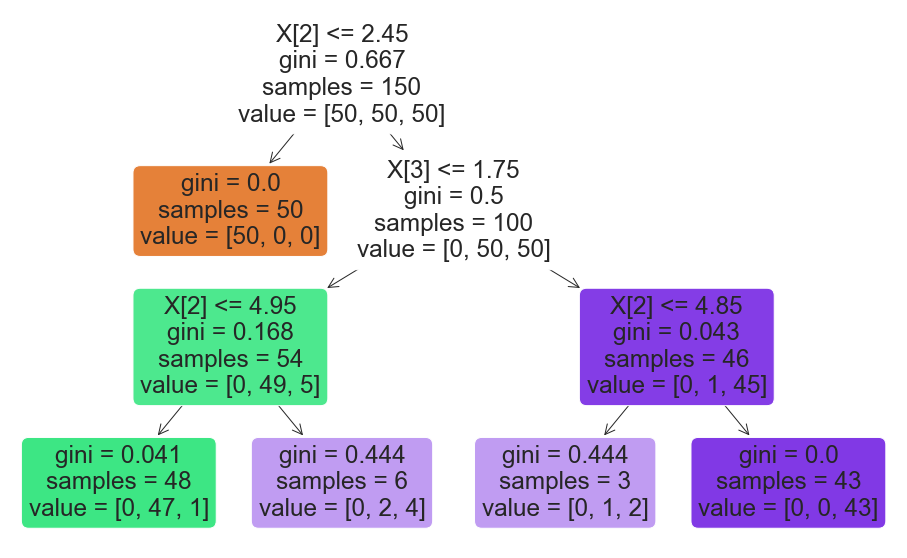

In [24]:
# Apply the decision tree classifier model to the data using all four parameters at once, but with a maximum tree depth of 3
model_all_params_max_depth_3 = DecisionTreeClassifier(max_depth = 3).fit(iris.data, iris.target)
# Prepare a plot figure with set size.
plt.figure(figsize = (16,10))
# Plot the decision tree.
plot_tree(model_all_params_max_depth_3,
          rounded = True,
          filled = True                )
# Display the tree plot figure.
plt.show()

This leaves (no pun intended) us with only four misclassified points by applying a total of four tests, and trimming one level sooner, i.e., setting max_depth to 2, would only have six errors out of the 150 points.

Another approach we might consider is to mandate that there must be a significant increase in impurity for the split to occur. Setting the min_impurity_decrease parameter will allow us to restrict splits to those that significantly improve the results of the overal model behavior.

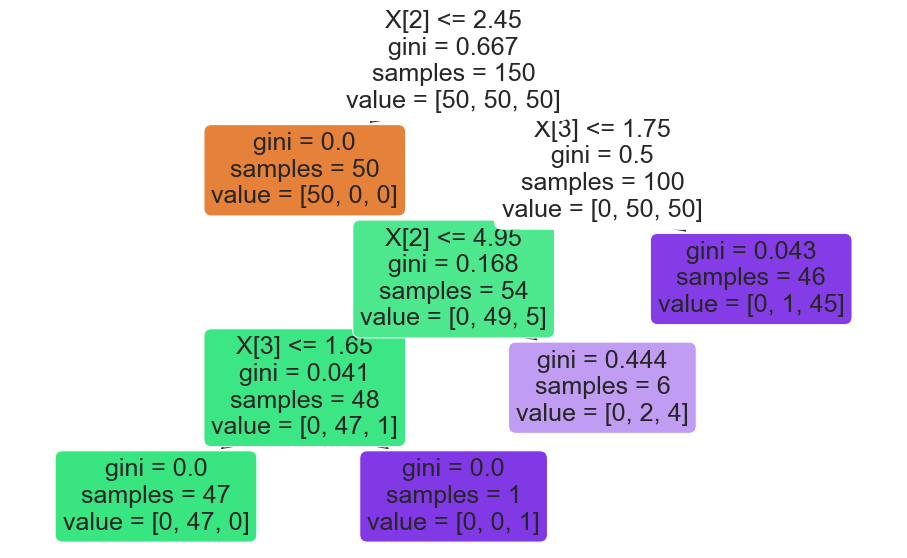

In [25]:
# Apply the model to the data as before, but with a minimum impurity decrease of 0.01
model_all_params_min_imp_dec_001 = DecisionTreeClassifier(min_impurity_decrease = 0.01).fit(iris.data, iris.target)
# Prepare a plot figure with set size.
plt.figure(figsize = (16,10))
# Plot the decision tree.
plot_tree(model_all_params_min_imp_dec_001,
          rounded = True,
          filled = True                )
# Display the tree plot figure.
plt.show()

This approach gets us to three misclassified points out of 150 with the same number of tests as before with max_depth = 3, but we are now able to apply the questions a bit more efficiently.

Having made this improvement using the full dataset, let's now circle back to that last subplot which also used only petal length and petal width and see how it shows in plot_tree().

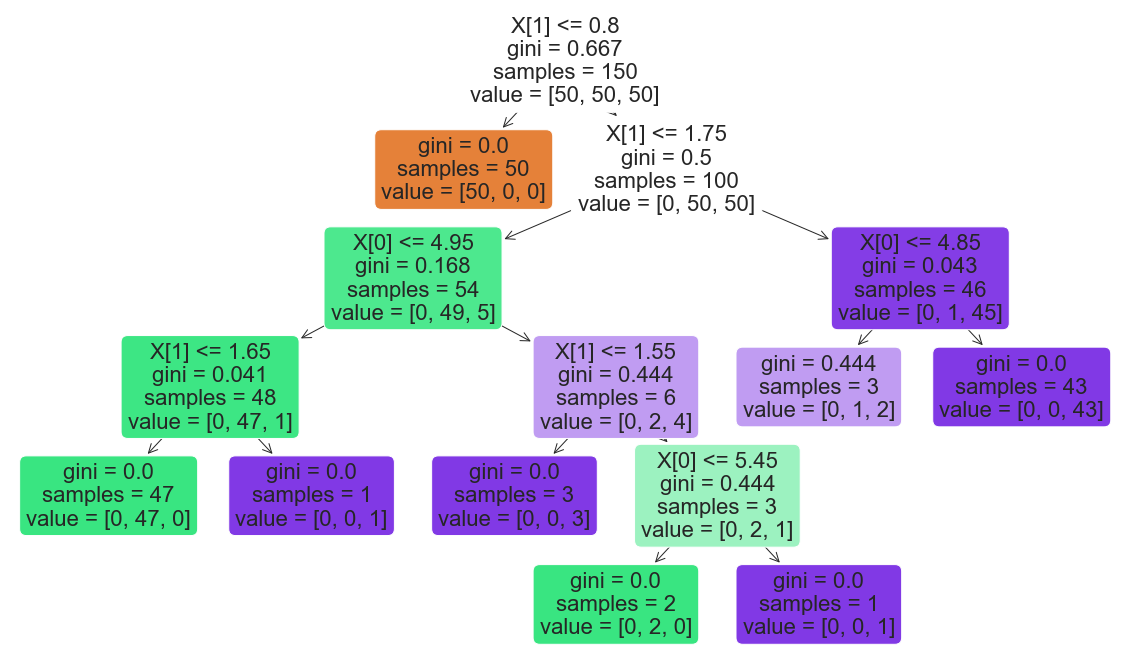

In [26]:
# Prepare a plot figure with set size.
plt.figure(figsize = (20,12))
# Plot the decision tree, showing the decisive values and the improvements in Gini impurity along the way.
plot_tree(models[5],
          rounded = True,
          filled = True  )
# Display the tree plot figure.
plt.show()